# Heart Disease Prediction Using Logistic Regression
## Author: Alwin Sebastian
## 2019BCS0042

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('heart.csv') #Dataset obtained from Kaggle
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.shape

(303, 14)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dataset.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

([<matplotlib.axis.XTick at 0x29936da7820>,
 [Text(0, 0, 'No Disease'), Text(1, 0, 'Have Disease')])

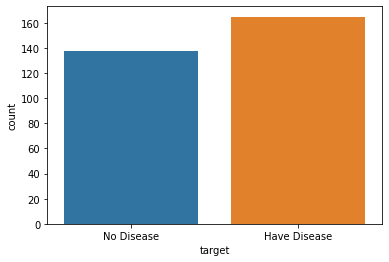

In [34]:
sns.countplot(data=dataset,x='target')
plt.xticks(ticks=[0,1],labels=["No Disease", 'Have Disease'])

In [9]:
num_have_disease = len(dataset[dataset['target']==1])
num_havenot_disease = len(dataset[dataset['target']==0])
percent_have_disease = (num_have_disease/len(dataset))*100
percent_havenot_disease = (num_havenot_disease/len(dataset))*100
print("Percentage of Patients Have Heart Disease: {:.2f}%".format(percent_have_disease))
print("Percentage of Patients who dont have Heart Disease: {:.2f}%".format(percent_havenot_disease))

Percentage of Patients Have Heart Disease: 54.46%
Percentage of Patients who dont have Heart Disease: 45.54%


In [10]:
100 * (dataset.corr()['target'].sort_values())

exang       -43.675708
oldpeak     -43.069600
ca          -39.172399
thal        -34.402927
sex         -28.093658
age         -22.543872
trestbps    -14.493113
chol         -8.523911
fbs          -2.804576
restecg      13.722950
slope        34.587708
thalach      42.174093
cp           43.379826
target      100.000000
Name: target, dtype: float64

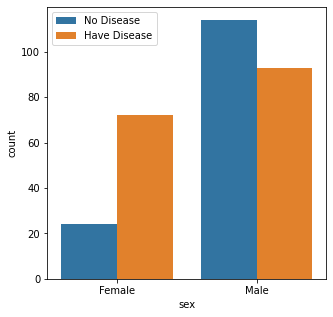

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(data=dataset,x='sex',hue='target')
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
plt.legend(["No Disease", 'Have Disease'])

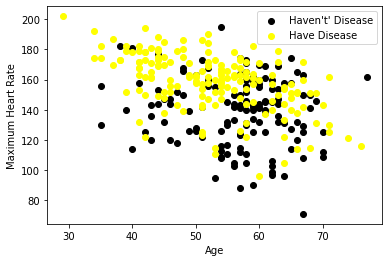

In [13]:
plt.scatter(x=dataset.age[dataset.target == 0] , y=dataset.thalach[dataset.target == 0],c='black')
plt.scatter(x=dataset.age[dataset.target == 1] , y=dataset.thalach[dataset.target == 1],c='yellow')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(["Haven't' Disease", 'Have Disease'])

In [14]:
dataset['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

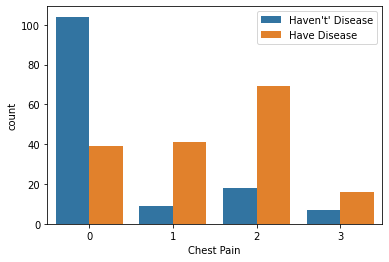

In [15]:
sns.countplot(data=dataset,x='cp',hue='target')
plt.xlabel('Chest Pain')
plt.legend(["No Disease", 'Have Disease'])

In [17]:
cp = pd.get_dummies(dataset['cp'],prefix='cp')
thal = pd.get_dummies(dataset['thal'],prefix='thal')
slope = pd.get_dummies(dataset['slope'],prefix='slope')

lst = [dataset,cp,thal,slope]
dataset = pd.concat(lst,axis=1)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [18]:
dataset.shape


(303, 25)

In [19]:
dataset.drop(columns=['cp','thal','slope'],axis=1,inplace=True)
dataset.shape

(303, 22)

In [20]:
X = dataset.drop(['target'],axis=1)
y = dataset['target']

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

In [22]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(242, 21) (61, 21)
(242,) (61,)


## Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
log_clf = LogisticRegression(solver='liblinear')

## Logistic Regression

In [30]:
log_clf.fit(X_train,y_train)
accuracy_train = log_clf.score(X_train, y_train)
print('Accuracy for Training :',str(round(accuracy_train*100,2))+' Percentage')

y_pred = log_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for Testing :',str(round(accuracy*100,2))+' Percentage')

Accuracy for Training : 86.36 Percentage
Accuracy for Testing : 90.16 Percentage


## Model Evaluation

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



Text(0.5, 1.0, 'Confusion Matrix')

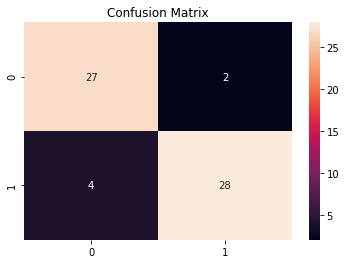

In [32]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')